## 🔎 Exploratory analysis of the [Fake News Dataset](https://www.kaggle.com/datasets/algord/fake-news)

In [1]:
import pandas as pd

# https://www.kaggle.com/datasets/algord/fake-news
df = pd.read_csv("../local_datasets/FakeNewsNet.csv", sep=",")

### 🧾 Information about the dataset

In [2]:
df.head(5)

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [3]:
df.dtypes

title            object
news_url         object
source_domain    object
tweet_num         int64
real              int64
dtype: object

In [4]:
print("Size:", df.shape)

Size: (23196, 5)


### 📃 Columns description in the dataset

In [5]:
!pip install Jinja2
descriptions = [
    "The title of the news article.",
    "The news URL of the article.",
    "the website from which the news article originates.",
    "Number of retweets the news article has received.",
    "The label indicating whether the news article is real (1) or fake (0)."
]
    
df_description = pd.DataFrame({
    "Column name": df.columns,
    "Description": descriptions
})

df_description.index = df_description.index + 1  # Start index at 1

df_description.style.set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'left')]},
    {'selector': 'td',
     'props': [('text-align', 'left')]}
])


[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


,Column name,Description
1,title,The title of the news article.
2,news_url,The news URL of the article.
3,source_domain,the website from which the news article originates.
4,tweet_num,Number of retweets the news article has received.
5,real,The label indicating whether the news article is real (1) or fake (0).


### 📃 Deletion of duplicate rows

The datasets contains duplicated entries. We will remove them to avoid bias in the training and evaluation of the models.
We need to consider that the column ```news_url``` is unique for each row, so we will not consider it when looking for duplicates.

In [6]:
duplicate_row_df = df[df.duplicated(subset=df.columns.difference(['news_url']))]
print("Number of duplicate rows:", duplicate_row_df.shape[0])
print("Size before removing duplicates:", df.shape)

Number of duplicate rows: 169
Size before removing duplicates: (23196, 5)


The dataset contains 169 duplicate rows. We will remove them now.

In [7]:
df = df.drop_duplicates(subset=df.columns.difference(['news_url']))
print("Size after removing duplicates:", df.shape)

Size after removing duplicates: (23027, 5)


### 📃 Check for missing values in the dataset

Let's check if there are any missing values in the dataset.

In [8]:
print(df.isnull().sum())

title              0
news_url         329
source_domain    329
tweet_num          0
real               0
dtype: int64


In [9]:
df = df.dropna()
print("Taille après suppression des lignes contenant au moins une valeur manquante :", df.shape)

Taille après suppression des lignes contenant au moins une valeur manquante : (22698, 5)


### 🧾 Number of true vs fake news

We can check the number of true vs fake news in the dataset, in order to see if the dataset is balanced or not.

In [10]:
real_news_count = df['real'].value_counts()[0]
fake_news_count = df['real'].value_counts()[1]
real_news_percent = (real_news_count / (real_news_count + fake_news_count)) * 100
fake_news_percent = (fake_news_count / (real_news_count + fake_news_count)) * 100
print("Number of real news articles:", real_news_count, "({:.2f}%)".format(real_news_percent))
print("Number of fake news articles:", fake_news_count, "({:.2f}%)".format(fake_news_percent))


Number of real news articles: 5382 (23.71%)
Number of fake news articles: 17316 (76.29%)


The difference between real and fake news articles is important. The dataset is not balanced.

Here a graphical representation of the number of true vs fake news articles.

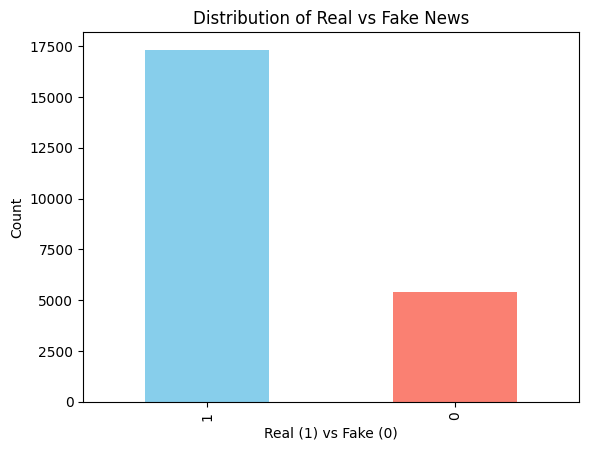

In [12]:
import matplotlib.pyplot as plt

df["real"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Real (1) vs Fake (0)")
plt.ylabel("Count")
plt.show()

### Conclusion
In this notebook, we have explored the Fake-News--dataset. We have done following operations to clean the dataset:
- Removed duplicate rows
- Removed missing values
- Checked for missing values
The dataset is now ready to be used for the evaluation of the chatbots.